In [1]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression




In [2]:
train_data = pd.DataFrame(pd.read_excel('Data_Train.xlsx'))
train_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# test_data = pd.DataFrame(pd.read_excel('Test_set.xlsx'))
# test_data.head()

In [4]:
# combine_dataframe = [train_data, test_data]
# df = pd.concat(combine_dataframe)

In [5]:
# shape of the df

train_data.shape

(10683, 11)

In [6]:
# size of df
train_data.size

117513

In [7]:
# information of dataframe

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
# split date of journey into day, date and year column
train_data[['Day', 'Month', 'Year']] = train_data['Date_of_Journey'].str.split('/', expand=True)
print(train_data)

           Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun

In [10]:
# converting Day, month and year column into integer datatype
train_data[['Day', 'Month', 'Year']] = train_data[['Day', 'Month', 'Year']].astype(int)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Day              10683 non-null  int64 
 12  Month            10683 non-null  int64 
 13  Year             10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [12]:
# Since we have day, month and year in seperate column, we don't need date_of_journey column

train_data.drop(columns='Date_of_Journey', axis=1, inplace=True)

In [13]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [14]:
# Preprocessing Arrival_time column
train_data['Arrival_Time'] = train_data['Arrival_Time'].str.split(' ').str[0]  #split arrival time and access index[0] i.e arrival_time, we already have month
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [15]:
#  Spliting Arrival_time into arrival_hour, arrival_min
train_data[['arrival_hour' , 'arrival_min']] = train_data['Arrival_Time'].str.split(':', expand= True) 

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
 13  arrival_hour     10683 non-null  object
 14  arrival_min      10683 non-null  object
dtypes: int64(4), object(11)
memory usage: 1.2+ MB


In [18]:
# converting arrival_hour and arrival_min column into integer datatype

train_data[['arrival_hour' , 'arrival_min']] = train_data[['arrival_hour' , 'arrival_min']].astype(int)

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
 13  arrival_hour     10683 non-null  int64 
 14  arrival_min      10683 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 1.2+ MB


In [20]:
# Since we have arrival_hour, arrival_min in seperate column, we don't need Arrival_time column anymore

train_data.drop('Arrival_Time', axis = 1, inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [21]:
train_data.shape

(10683, 14)

In [22]:
train_data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Dep_Time           0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Day                0
Month              0
Year               0
arrival_hour       0
arrival_min        0
dtype: int64

In [23]:
train_data.dropna(inplace=True)
train_data.isna().sum()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Day                0
Month              0
Year               0
arrival_hour       0
arrival_min        0
dtype: int64

In [24]:
# split dep_time into dep_hour, dep_min
train_data[['Dep_hour', 'Dep_min']] = train_data['Dep_Time'].str.split(':', expand=True)

In [25]:
# converting dep_hour, dep_min into integer data type
train_data[['Dep_hour', 'Dep_min']] = train_data[['Dep_hour', 'Dep_min']].astype(int)

In [26]:
# checking unique on total_stop column
train_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [27]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,arrival_hour,arrival_min,Dep_hour,Dep_min


In [28]:
train_data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [29]:
train_data.drop('Route', axis = 1, inplace = True)

In [30]:
# index of null value
train_data[train_data.isnull().any(axis=1)].index

Index([], dtype='int64')

In [31]:
train_data.drop('Dep_Time', axis=1, inplace=True)

In [32]:
train_data.isnull().sum()

Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Day                0
Month              0
Year               0
arrival_hour       0
arrival_min        0
Dep_hour           0
Dep_min            0
dtype: int64

In [33]:
train_data = pd.get_dummies(train_data, drop_first=True)
train_data

,Price,Day,Month,Year,arrival_hour,arrival_min,Dep_hour,Dep_min,Airline_Air India,Airline_GoAir,...,Total_Stops_non-stop,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,3897,24,3,2019,1,10,22,20,False,False,...,True,False,False,False,False,False,False,False,True,False
1,7662,1,5,2019,13,15,5,50,True,False,...,False,False,False,False,False,False,False,False,True,False
2,13882,9,6,2019,4,25,9,25,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6218,12,5,2019,23,30,18,5,False,False,...,False,False,False,False,False,False,False,False,True,False
4,13302,1,3,2019,21,35,16,50,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107,9,4,2019,22,25,19,55,False,False,...,True,False,False,False,False,False,False,False,True,False
10679,4145,27,4,2019,23,20,20,45,True,False,...,True,False,False,False,False,False,False,False,True,False
10680,7229,27,4,2019,11,20,8,20,False,False,...,True,False,False,False,False,False,False,False,True,False
10681,12648,1,3,2019,14,10,11,30,False,False,...,True,False,False,False,False,False,False,False,True,False


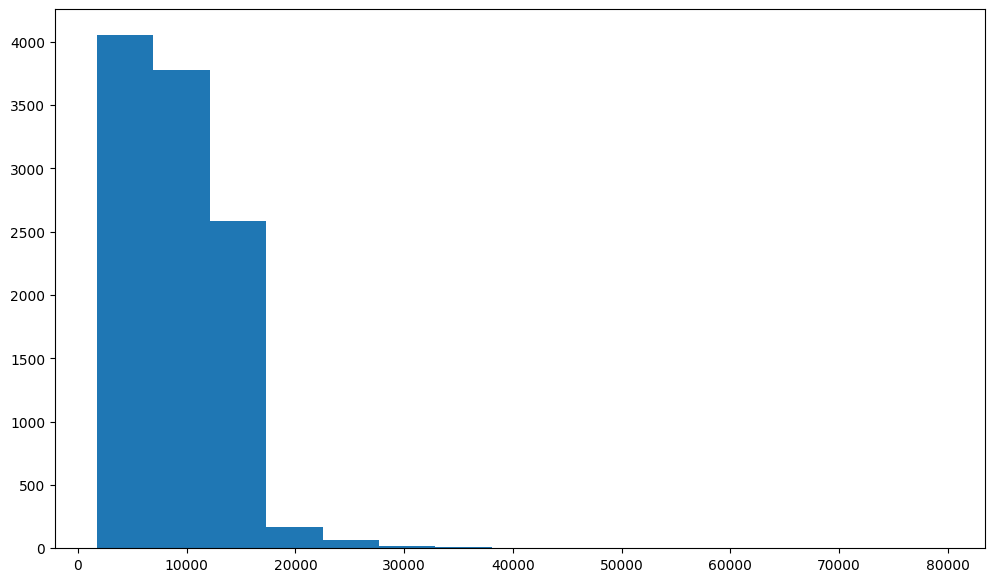

In [55]:
plt.figure(figsize=(12,7))
plt.hist(train_data['Price'], bins=15)
plt.show()


In [35]:
x = train_data.drop(columns='Price', axis=1)
y = train_data['Price']

In [36]:
X_train, x_test, Y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [37]:
x_test

,Day,Month,Year,arrival_hour,arrival_min,Dep_hour,Dep_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Total_Stops_non-stop,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
6075,21,5,2019,1,30,15,5,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3544,3,6,2019,19,35,10,35,False,True,False,...,False,False,False,False,False,False,False,False,True,False
9291,9,5,2019,9,5,20,20,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5032,24,5,2019,17,5,14,45,False,False,True,...,True,False,False,False,False,False,False,False,True,False
2483,21,5,2019,4,25,22,50,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9797,27,6,2019,21,0,8,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9871,6,3,2019,19,45,17,15,False,False,False,...,True,False,False,False,False,False,False,False,True,False
10063,21,4,2019,22,25,7,55,False,False,False,...,False,False,False,False,False,False,False,False,True,False
8802,24,3,2019,23,25,6,30,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [38]:
# x_train_simple = X_train['Year'].values.reshape(-1,1)
# x_test_simpole = x_test['Year'].values.reshape(-1,1)
# Y_train

In [39]:
simple_lr = LinearRegression()
simple_lr.fit(X_train, Y_train)

LinearRegression()

In [40]:
# Score on test datasets
pred_from_linear = simple_lr.predict(x_test)
pred_from_linear

array([14512.,  7424.,  8544., ...,  6704., 10720., 14224.])

In [41]:
# score on training dataset
simple_lr.score(X_train, Y_train)

0.7461241724880149

Slightly overfitting because test_set is less than training_set

Now to avoid overfitting we have something called Lasso regression

In [42]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, Y_train)


Lasso(alpha=50, max_iter=100, tol=0.1)

In [43]:
lasso_reg.score(X_train, Y_train)

0.6076236000676232

In [44]:
lasso_reg.score(x_test, y_test)

0.6251137790650634

In [45]:
pred_from_lasso = lasso_reg.predict(x_test)
pred_from_lasso

array([12188.67382837,  9615.60761338,  9779.20136315, ...,
        9047.98104613, 10053.86492031, 13159.79018572])

In [46]:
data = pd.DataFrame({"Lasso Regression": pred_from_lasso, "LinearRegression": pred_from_linear})
data.head()

,Lasso Regression,LinearRegression
0,12188.673828,14512.0
1,9615.607613,7424.0
2,9779.201363,8544.0
3,3175.613163,4064.0
4,9752.699676,9984.0


Now let's see through Ridge Regression


In [47]:
# Importing linear model
from sklearn import linear_model   

In [48]:
ridg = linear_model.Ridge(alpha=50, max_iter=100, tol=0.1)
ridg.fit(X_train, Y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [52]:
# Accuracy with ridge from training
ridg.score(X_train, Y_train)

0.6595783326677047

In [53]:
# Accuracy with ridge from testing
ridg.score(x_test, y_test)

0.6683284509866807

It seems like ridge regression gives the best accuracy with training_set and testing_set

In [49]:
ridge_pred = ridg.predict(x_test) 
ridge_pred

array([13248.33679361,  7914.67937258,  9146.0774697 , ...,
        8373.72106135,  9890.13988714, 13684.75613678])

In [50]:
data = pd.DataFrame({"Lasso Regression": pred_from_lasso, "LinearRegression": pred_from_linear, 'Ridge Regression': ridge_pred})
data.head()


,Lasso Regression,LinearRegression,Ridge Regression
0,12188.673828,14512.0,13248.336794
1,9615.607613,7424.0,7914.679373
2,9779.201363,8544.0,9146.077470
3,3175.613163,4064.0,3809.952334
4,9752.699676,9984.0,9840.112391


In [76]:
# # plot
# plt.figure(figsize=(12.6))
# sns.regplot(x = 'Year', y = 'Price', data= df)
# plt.show()

Prediction from multiple features

In [77]:
# Taking multiple columns
to_select = ['Day', 'Month', 'Year', 'arrival_hour', 'arrival_min', 'Dep_hour', 'Dep_min']



In [78]:
x_train_multi = X_train[to_select].values
x_test_multi =  x_test[to_select].values


In [79]:
multi_lr = LinearRegression()
multi_lr.fit(x_train_multi, Y_train)

LinearRegression()

In [81]:
y_pred_multi = multi_lr.predict(x_test_multi)
y_pred_multi[:5]

array([8605.29958459, 8977.04096041, 9535.7838826 , 8447.25045853,
       8035.72082299])

In [82]:
# coffecient
multi_lr.coef_

array([-8.52414061e+01, -4.83745065e+02, -1.13686838e-13,  8.45453973e+00,
       -2.86872542e+01,  8.33125648e+00, -1.00499611e+01])

In [83]:
# intercept 
multi_lr.intercept_


13247.089280940829